Importuri

In [313]:
import numpy, matplotlib.pyplot as plt, scipy.io.wavfile as wavf, scipy.signal as sig, sounddevice, time

Exercitiul 1

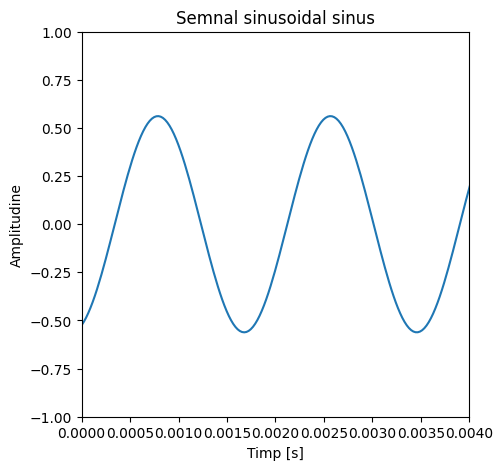

Finished first signal, waiting 2 seonds


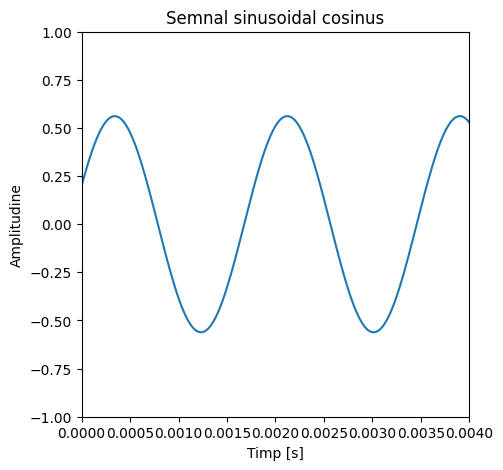

In [155]:
# Semnal sinusoidal de tip sinus 
amplitudine = numpy.random.uniform(0.5, 0.9)
frecventa = numpy.random.uniform(500, 1000)
faza = numpy.random.uniform(0, 2 * numpy.pi)
frecventa_de_esantionare = 44100
timp = 5
t = numpy.linspace(0,timp, int(timp * frecventa_de_esantionare))
semnal_sinus = amplitudine * numpy.sin(2 * numpy.pi * frecventa * t + faza)
plt.plot(t, semnal_sinus)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal sinus')
plt.xlim(0, 0.004)
plt.ylim(-1, 1)
plt.savefig(fname = './semnal_sinusoidal_sinus.pdf', format = 'pdf')
plt.show()

sounddevice.play(semnal_sinus, frecventa_de_esantionare)
rate = int(10e5)
wavf.write("semnal_sinusoidal_sinus.wav", rate, semnal_sinus)
print("Finished first signal, waiting 2 seonds")
time.sleep(2)
semnal_cosinus = amplitudine * numpy.sin(2 * numpy.pi * frecventa * t + faza + numpy.pi / 2)
plt.plot(t, semnal_cosinus)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cosinus')
plt.xlim(0, 0.004)
plt.ylim(-1, 1)
plt.savefig(fname = './semnal_sinusoidal_sinus.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_cosinus, frecventa_de_esantionare)
wavf.write("semnal_sinusoidal_cosinus.wav", rate, semnal_cosinus)

Exercitiul 2

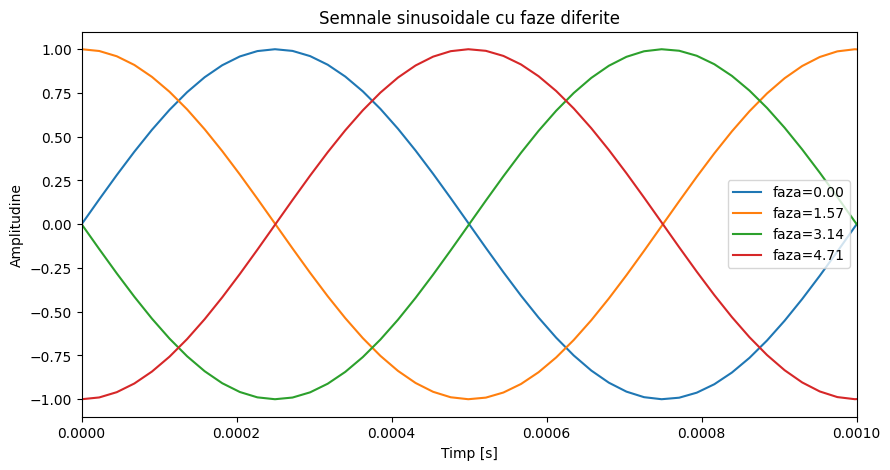

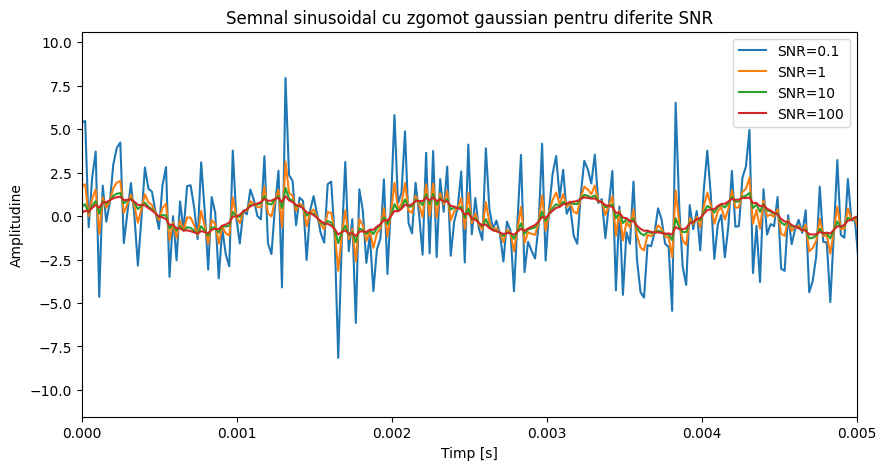

In [156]:
frec = 1000
amplitudine_unitara = 1
timp = 1
frecventa_de_esantionare = 44100
t = numpy.linspace(0, timp, int(timp * frecventa_de_esantionare))
faze = [0, numpy.pi/2, numpy.pi, 3*numpy.pi/2]
semnale = [amplitudine_unitara * numpy.sin(2 * numpy.pi * frec * t + faza) for faza in faze]

plt.figure(figsize=(10,5))
for idx, semnal in enumerate(semnale):
    plt.plot(t, semnal, label=f'faza={faze[idx]:.2f}')
plt.xlim(0, 0.001)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnale sinusoidale cu faze diferite')
plt.legend()
plt.savefig(fname = './semnale_sinusoidale_cu_faze_diferite.pdf', format = 'pdf')
plt.show()

z = numpy.random.normal(0, 1, t.shape)
x = semnale[0]
snr_values = [0.1, 1, 10, 100]
noisy_signals = []

for snr in snr_values:
    gamma = numpy.linalg.norm(x) / (numpy.sqrt(snr) * numpy.linalg.norm(z))
    x_noisy = x + gamma * z
    noisy_signals.append(x_noisy)

plt.figure(figsize=(10,5))
for idx, x_noisy in enumerate(noisy_signals):
    plt.plot(t, x_noisy, label=f'SNR={snr_values[idx]}')
plt.xlim(0, 0.005)
plt.xlabel('Timp [s]')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal cu zgomot gaussian pentru diferite SNR')
plt.legend()
plt.savefig(fname = './semnal_sinusoidal_cu_zgomot_gaussian.pdf', format = 'pdf')
plt.show()


Exercitiul 3

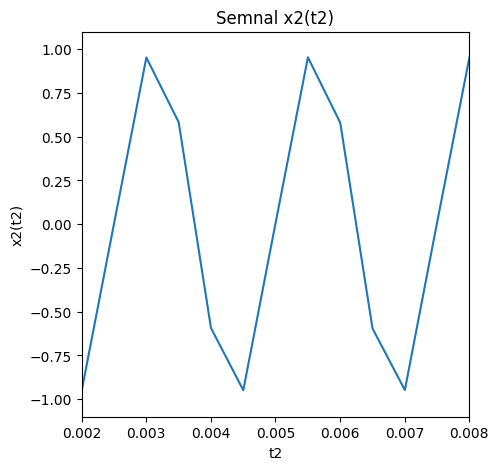

In [ ]:
# Sunetul de la 2 a) din laboratorul precedent
frec_a = 400
nr_samples = 1600
rate = 2000
t2 = numpy.linspace(0, nr_samples / rate, nr_samples)  # rate in loc de frec_a pentru a auzi
x2 = numpy.sin(2 * numpy.pi * frec_a * t2)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(t2, x2)
plt.xlabel('t2')
plt.ylabel('Amplitudine')
plt.title('Semnal x2(t2)')
plt.xlim(0.002, 0.008)
plt.show()
sounddevice.play(x2, rate)
sounddevice.wait()
wavf.write("semnal_x2_400frecventa.wav", rate, x2)
rata, semnal = wavf.read("semnal_x2_400frecventa.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()  

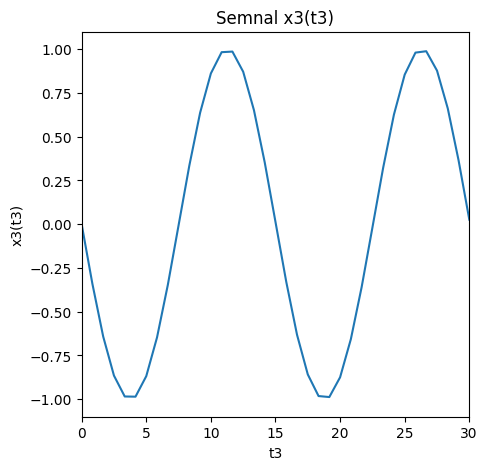

In [ ]:
# Sunetul de la 2 b) din laboratorul precedent
frec_b = 800
duration_b = 3
nr_samples_b = int(frec_b * duration_b)
t3 = numpy.linspace(0, rate, nr_samples_b) # rata in loc de duration_b pentru a auzi
x3 = numpy.sin(2 * numpy.pi * frec_b * t3)
plt.plot(t3, x3)
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('t3')
plt.ylabel('Amplitudine')
plt.title('Semnal x3(t3)')
plt.xlim(0, 30)
plt.show()
sounddevice.play(x3, rate)
wavf.write("semnal_x3_800frecventa.wav", rate, x2)
sounddevice.wait()
rata, semnal = wavf.read("semnal_x3_800frecventa.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()

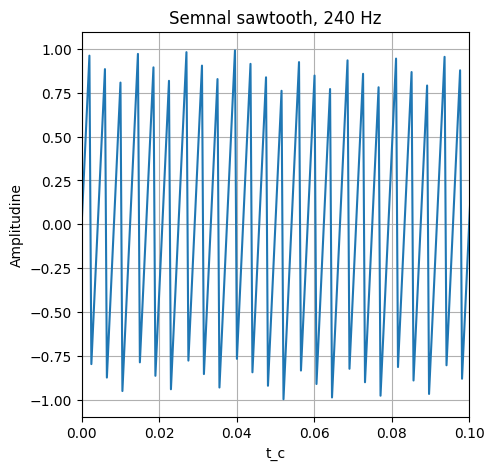

In [244]:
# Sunetul de la 2 c) din laboratorul precedent
frec_c = 240
duration_c = 0.3 # durata crescuta pentru a auzi sunetul
fs_c = 2000  
t_c = numpy.linspace(0, duration_c, int(fs_c * duration_c))
saw_c = 2 * (t_c * frec_c - numpy.floor(0.5 + t_c * frec_c))  # amplitudine [-1, 1]
plt.plot(t_c, saw_c)
plt.xlabel('t_c')
plt.ylabel('Amplitudine')
plt.xlim(0, 0.1)
plt.title('Semnal sawtooth, 240 Hz')
plt.grid(True)
plt.show()
sounddevice.play(saw_c, fs_c)
wavf.write("semnal_sawtooth_240frecventa.wav", fs_c, saw_c)
sounddevice.wait()
rata, semnal = wavf.read("semnal_sawtooth_240frecventa.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()

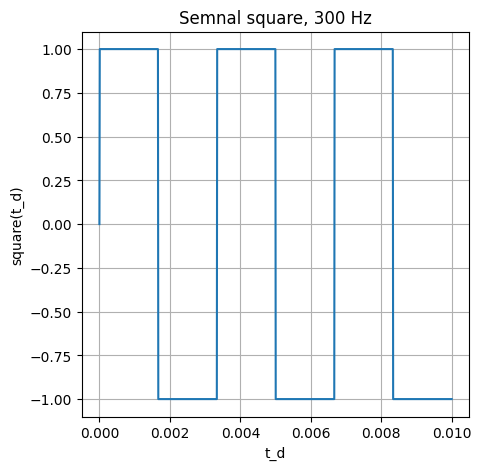

In [ ]:
# Sunetul de la 2 d) din laboratorul precedent
frec_d = 300
duration_d = 0.01
fs_d = 100000
t_d = numpy.linspace(0, duration_d, int(fs_d * duration_d))
square_d = numpy.sign(numpy.sin(2 * numpy.pi * frec_d * t_d))
plt.plot(t_d, square_d)
plt.xlabel('t_d')
plt.ylabel('Amplitudine')
plt.title('Semnal square, 300 Hz')
plt.grid(True)
plt.show()
sounddevice.play(saw_c, fs_c)
wavf.write("semnal_square_300Hz.wav", fs_c, saw_c)
sounddevice.wait()
rata, semnal = wavf.read("semnal_square_300Hz.wav")
sounddevice.play(semnal, rata)
sounddevice.wait()

Exercitiul 4

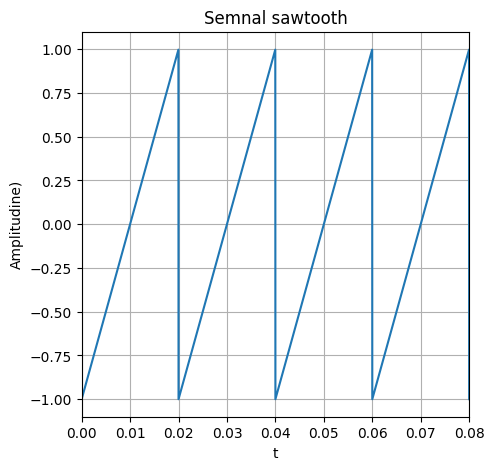

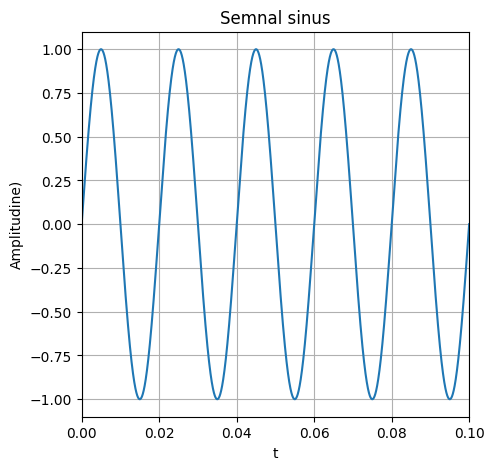

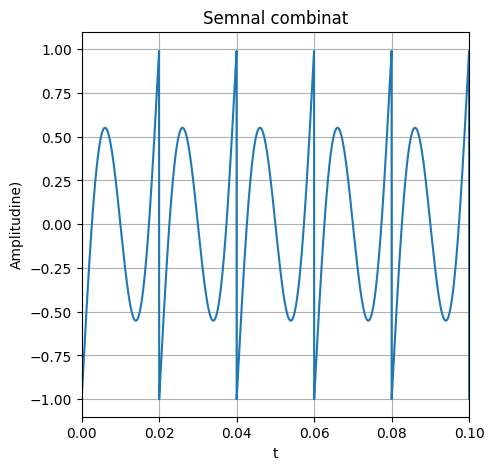

In [243]:
frecventa = 50
duration_c = 2
rata_esantion = 40000  
t = numpy.linspace(0, duration_c, int(rata_esantion * duration_c))
saw_c = sig.sawtooth(2 * numpy.pi * frecventa * t)
semnal_sinus = numpy.sin(2 * numpy.pi * frecventa * t)
semnal_combinat = semnal_sinus + saw_c
plt.plot(t, saw_c)
plt.xlabel('t')
plt.ylabel('Amplitudine)')
plt.title('Semnal sawtooth')
plt.grid(True)
plt.xlim(0, 0.08)
plt.savefig(fname = './semnal_sawtooth_ex4.pdf', format = 'pdf')
plt.show()
sounddevice.play(saw_c, rata_esantion)
sounddevice.wait()
plt.plot(t, semnal_sinus)
plt.xlabel('t')
plt.ylabel('Amplitudine)')
plt.title('Semnal sinus')
plt.grid(True)
plt.xlim(0, 0.1)
plt.savefig(fname = './semnal_sinusoidal_ex4.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_sinus, rata_esantion)
sounddevice.wait()
plt.plot(t, semnal_combinat)
plt.xlabel('t')
plt.ylabel('Amplitudine)')
plt.title('Semnal combinat')
plt.grid(True)
plt.xlim(0, 0.1)
plt.savefig(fname = './semnal_sinusoidal_sawtooth_ex4.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_combinat, rata_esantion)
sounddevice.wait()

Exercitiul 5

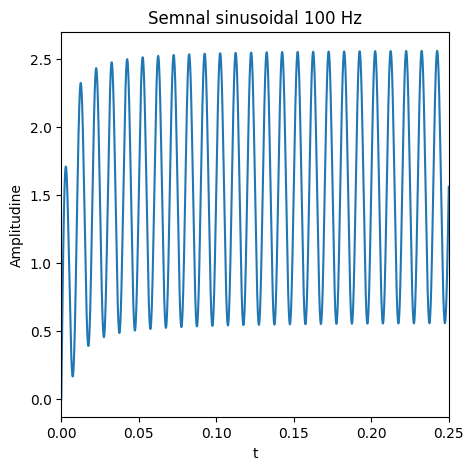

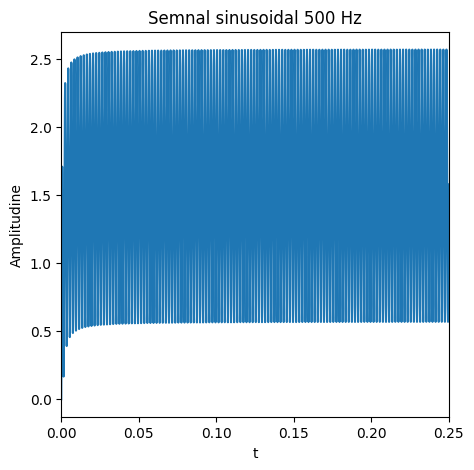

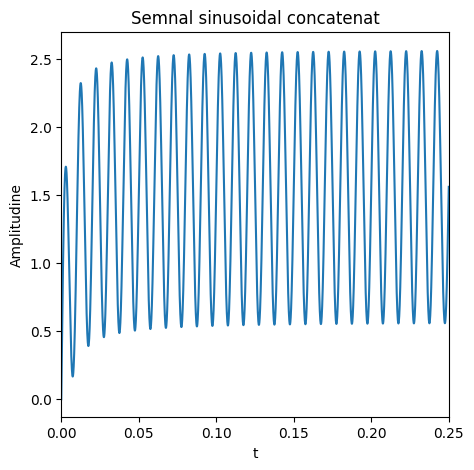

In [264]:
rata_esantionare = 44100
frecventa_1 = 100
frecventa_2 = 500
durata = 2
t = numpy.linspace(0, durata, int(rata_esantionare * durata))
semnal_1 = numpy.sin(2 * numpy.pi * frecventa_1 * t) + numpy.arctan(numpy.pi * frecventa_1 * t)
semnal_2 = numpy.sin(2 * numpy.pi * frecventa_2 * t) + numpy.arctan(numpy.pi * frecventa_2 * t)
t_concat = numpy.linspace(0, 2 * durata, int(2 * rata_esantionare * durata))
semnal_concatenat = numpy.concatenate((semnal_1, semnal_2))
plt.plot(t, semnal_1)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal 100 Hz')
plt.xlim(0, 0.25)
plt.savefig(fname = './semnal_1_unda_unica_ex5.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_1, rata_esantionare)
sounddevice.wait()
plt.plot(t, semnal_2)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal 500 Hz')
plt.xlim(0, 0.25)
plt.savefig(fname = './semnal_2_unda_unica_ex5.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_2, rata_esantionare)
sounddevice.wait()
plt.plot(t_concat, semnal_concatenat)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal concatenat')
plt.xlim(0, 0.25)
plt.savefig(fname = './semnal_concatenat_unda_unica_ex5.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_concatenat, rata_esantionare)
sounddevice.wait()

Exercitiul 6

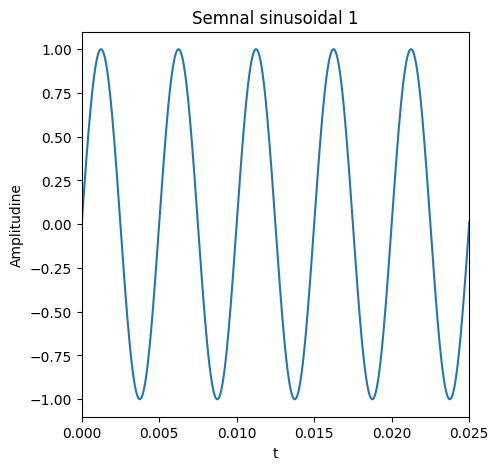

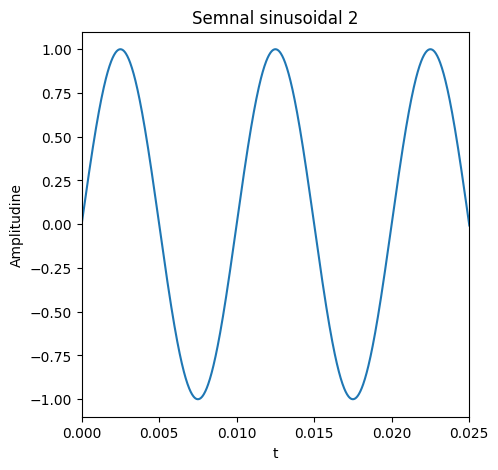

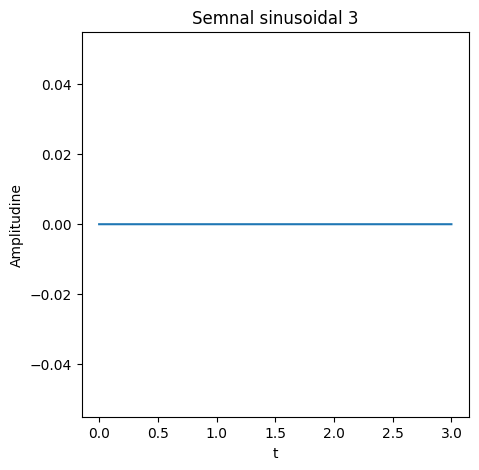

In [268]:
frecventa_esantionare = 400
frecventa_sin_1 = frecventa_esantionare / 2
frecventa_sin_2 = frecventa_esantionare / 4
frecventa_sin_3 = 0
durata = 3
rata_esantionare = 44100
t = numpy.linspace(0, durata, int(rata_esantionare * durata))
semnal_sinus_1 = numpy.sin(2 * numpy.pi * frecventa_sin_1 * t)
semnal_sinus_2 = numpy.sin(2 * numpy.pi * frecventa_sin_2 * t)
semnal_sinus_3 = numpy.sin(2 * numpy.pi * frecventa_sin_3 * t)

plt.plot(t, semnal_sinus_1)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal 1')
plt.xlim(0, 0.025)
plt.savefig(fname = './semnal_sinus_1_ex6.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_1, rata_esantionare)
sounddevice.wait()
plt.plot(t, semnal_sinus_2)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal 2')
plt.xlim(0, 0.025)
plt.savefig(fname = './semnal_sinus_2_ex6.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_2, rata_esantionare)
sounddevice.wait()
plt.plot(t, semnal_sinus_3)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal 3')
plt.savefig(fname = './semnal_sinus_3_ex6.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_concatenat, rata_esantionare)
sounddevice.wait()

Exercitiul 7

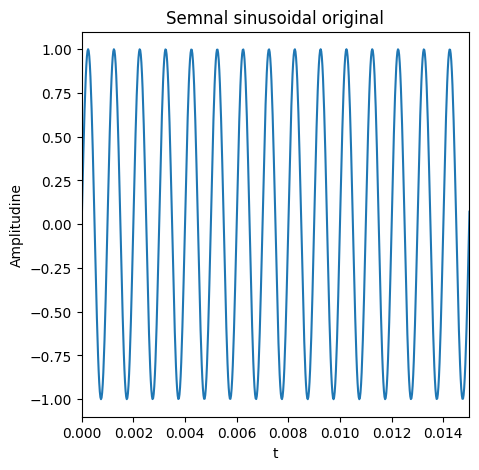

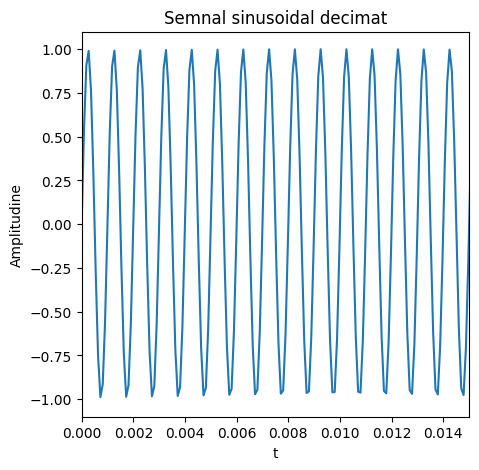

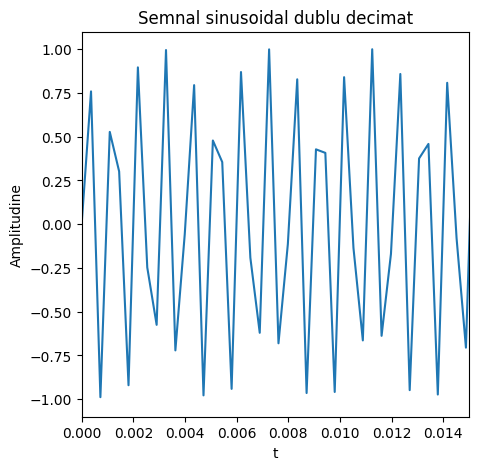

In [306]:
f_esantionare = 1000
durata = 3
rata_esantionare = 44100
t_original = numpy.linspace(0, durata, int(rata_esantionare * durata))
t_decimat = t_original[::4]
t_dublu_decimat = t_decimat[::4]
semnal_original = numpy.sin(2 * numpy.pi * f_esantionare * t)
semnal_decimat = semnal_original[::4] # semnalul decimat este mai ascutit si mai scurt fata de cel original deoarece ramane doar al 4-lea esantion
semnal_dublu_decimat = semnal_decimat[::4] # semnalul dublu decimat ar trebui sa foe si mai ascutit si scurt fata de cel decimat, dar este imposibil de redat fiind prea putine esantione si sunetul prea scurt
# Pe masura ce decimam semnalul, pierdem informatii, iar acesta nici nu mai arata ca un semnal sinusoidal
plt.plot(t_original, semnal_original)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal original')
plt.xlim(0, 0.015)
plt.savefig(fname = './semnal_original_ex7.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_original, rata_esantionare)
sounddevice.wait()
plt.plot(t_decimat, semnal_decimat)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal decimat')
plt.xlim(0, 0.015)
plt.savefig(fname = './semnal_decimat_ex7.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_decimat, rata_esantionare)
sounddevice.wait()
plt.plot(t_dublu_decimat, semnal_dublu_decimat)
plt.xlabel('t')
plt.ylabel('Amplitudine')
plt.title('Semnal sinusoidal dublu decimat')
plt.xlim(0, 0.015)
plt.savefig(fname = './semnal_dublu_decimat_ex7.pdf', format = 'pdf')
plt.show()
sounddevice.play(semnal_dublu_decimat, rata_esantionare)
sounddevice.wait()

Exercitiul 8

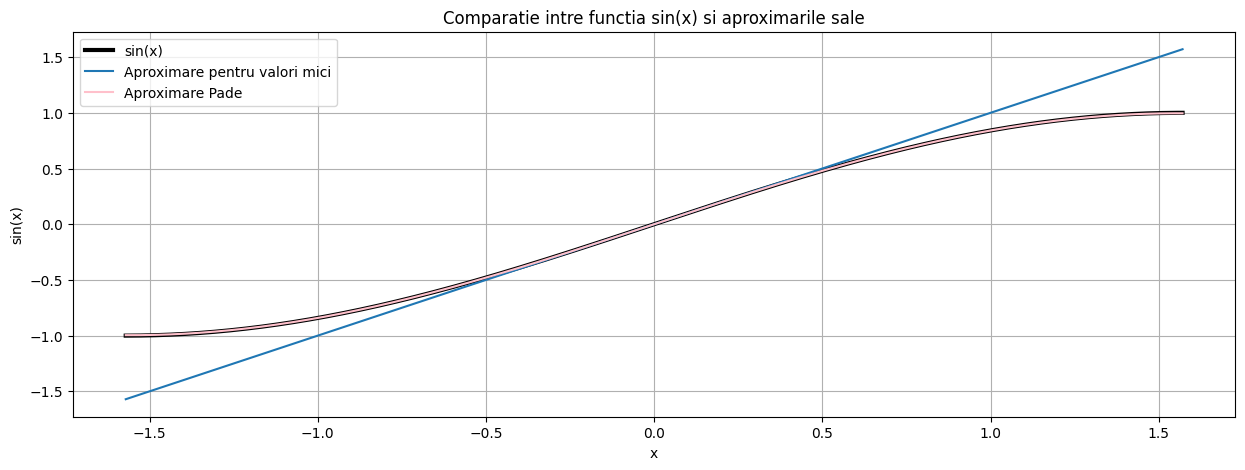

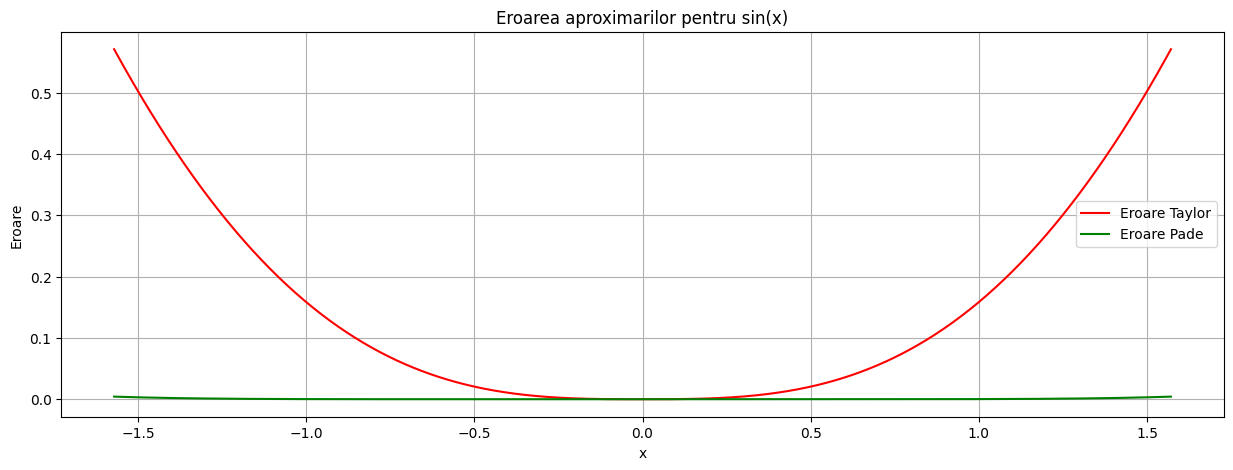

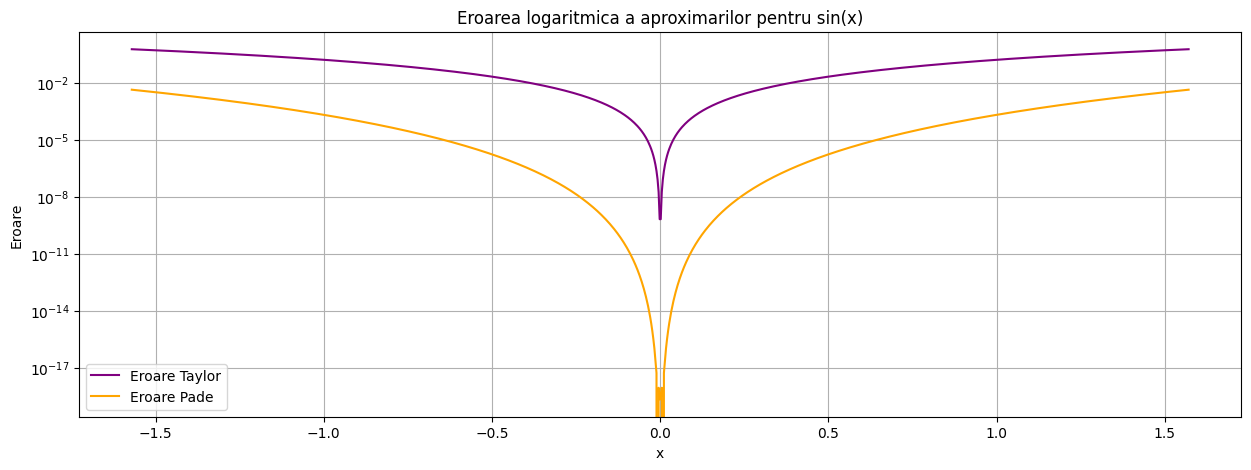

In [327]:
interval = numpy.linspace((- numpy.pi) / 2, numpy.pi / 2, 1000)
alpha_sin = numpy.sin(interval)
aporx_sin_val_mici = interval # Aproximare Taylor pentru valori mici
aprox_pade = (interval - (7 * interval ** 3 / 60)) / (1 + (interval ** 2 / 20))
eroare_taylot = numpy.abs(alpha_sin - aporx_sin_val_mici)
eroare_pade = numpy.abs(alpha_sin - aprox_pade)
plt.figure(figsize=(15, 5))
plt.plot(interval, alpha_sin, label = 'sin(x)', color = 'black', linewidth = 3)
plt.plot(interval, aporx_sin_val_mici, label = 'Aproximare pentru valori mici')
plt.plot(interval, aprox_pade, label = 'Aproximare Pade', color = 'pink')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Comparatie intre functia sin(x) si aproximarile sale')
plt.legend()
plt.grid(True)
plt.savefig(fname = './comparatie_aproximare_sin_ex8.pdf', format = 'pdf')
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(interval, eroare_taylot, label = 'Eroare Taylor', color = 'red')
plt.plot(interval, eroare_pade, label = 'Eroare Pade', color = 'green')
plt.xlabel('x')
plt.ylabel('Eroare')
plt.title('Eroarea aproximarilor pentru sin(x)')
plt.legend()
plt.grid(True)
plt.savefig(fname = './eroare_aproximari_sin_ex8.pdf', format = 'pdf')
plt.show()
plt.figure(figsize=(15, 5))
plt.plot(interval, eroare_taylot, label = 'Eroare Taylor', color = 'purple')
plt.plot(interval, eroare_pade, label = 'Eroare Pade', color = 'orange')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Eroare')
plt.title('Eroarea logaritmica a aproximarilor pentru sin(x)')
plt.legend()
plt.grid(True)
plt.savefig(fname = './eroare_logaritmica_aproximari_sin_ex8.pdf', format = 'pdf')
plt.show()